In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def potf(x):
    return 0*x

def potpot(x):
    return 0*x

def potq(x):
    return 10*x**2/2

def double_well(x,a=0.1,b=1):
    return a*((x/b)**2-1)**2

def step(x,pot,dx=0.01):
    dx = np.random.choice([-1,1],len(x))*dx
    return x + (np.random.random(len(x))<np.exp(-pot(x+dx)+pot(x)))*dx

In [28]:
def plot_sim(x,xinit=0):
    msd = np.average((x-xinit)**2,axis=1)
    hist,bins = np.histogram(x,bins=50,density=True)
    fig,ax = plt.subplots(3,1,figsize=(20,20))
    for j in range(0,x.shape[1]):
        ax[0].plot(x[:,j])
    ax[1].plot(msd)
    ax[2].plot(bins[:-1],hist)

def do_sim(num_steps,num_traj,pot,xinit=0):
    x = np.ones((num_steps,num_traj))*xinit
    i_init = np.zeros(num_traj)
    mask = np.zeros(num_traj)
    jump_times = np.zeros(10*num_traj)
    num_jumps = 0
    for i in range(0,num_steps):
        x[i] = step(x[i-1],pot)
        mask = x[i] < 0
        jump_times[num_jumps:num_jumps+np.sum(mask)] = i - i_init[mask]
        x[i][mask]=xinit
        num_jumps += np.sum(mask)
        i_init[mask] = i
        if num_jumps>1000:
            break
    jump_times = jump_times[0:num_jumps]
    return x, jump_times

def run():
    x, jumps = do_sim(30000,1000,double_well,xinit=1)
    plot_sim(x,xinit=1)
    plt.show()
    plt.hist(jumps)
    print(jumps)

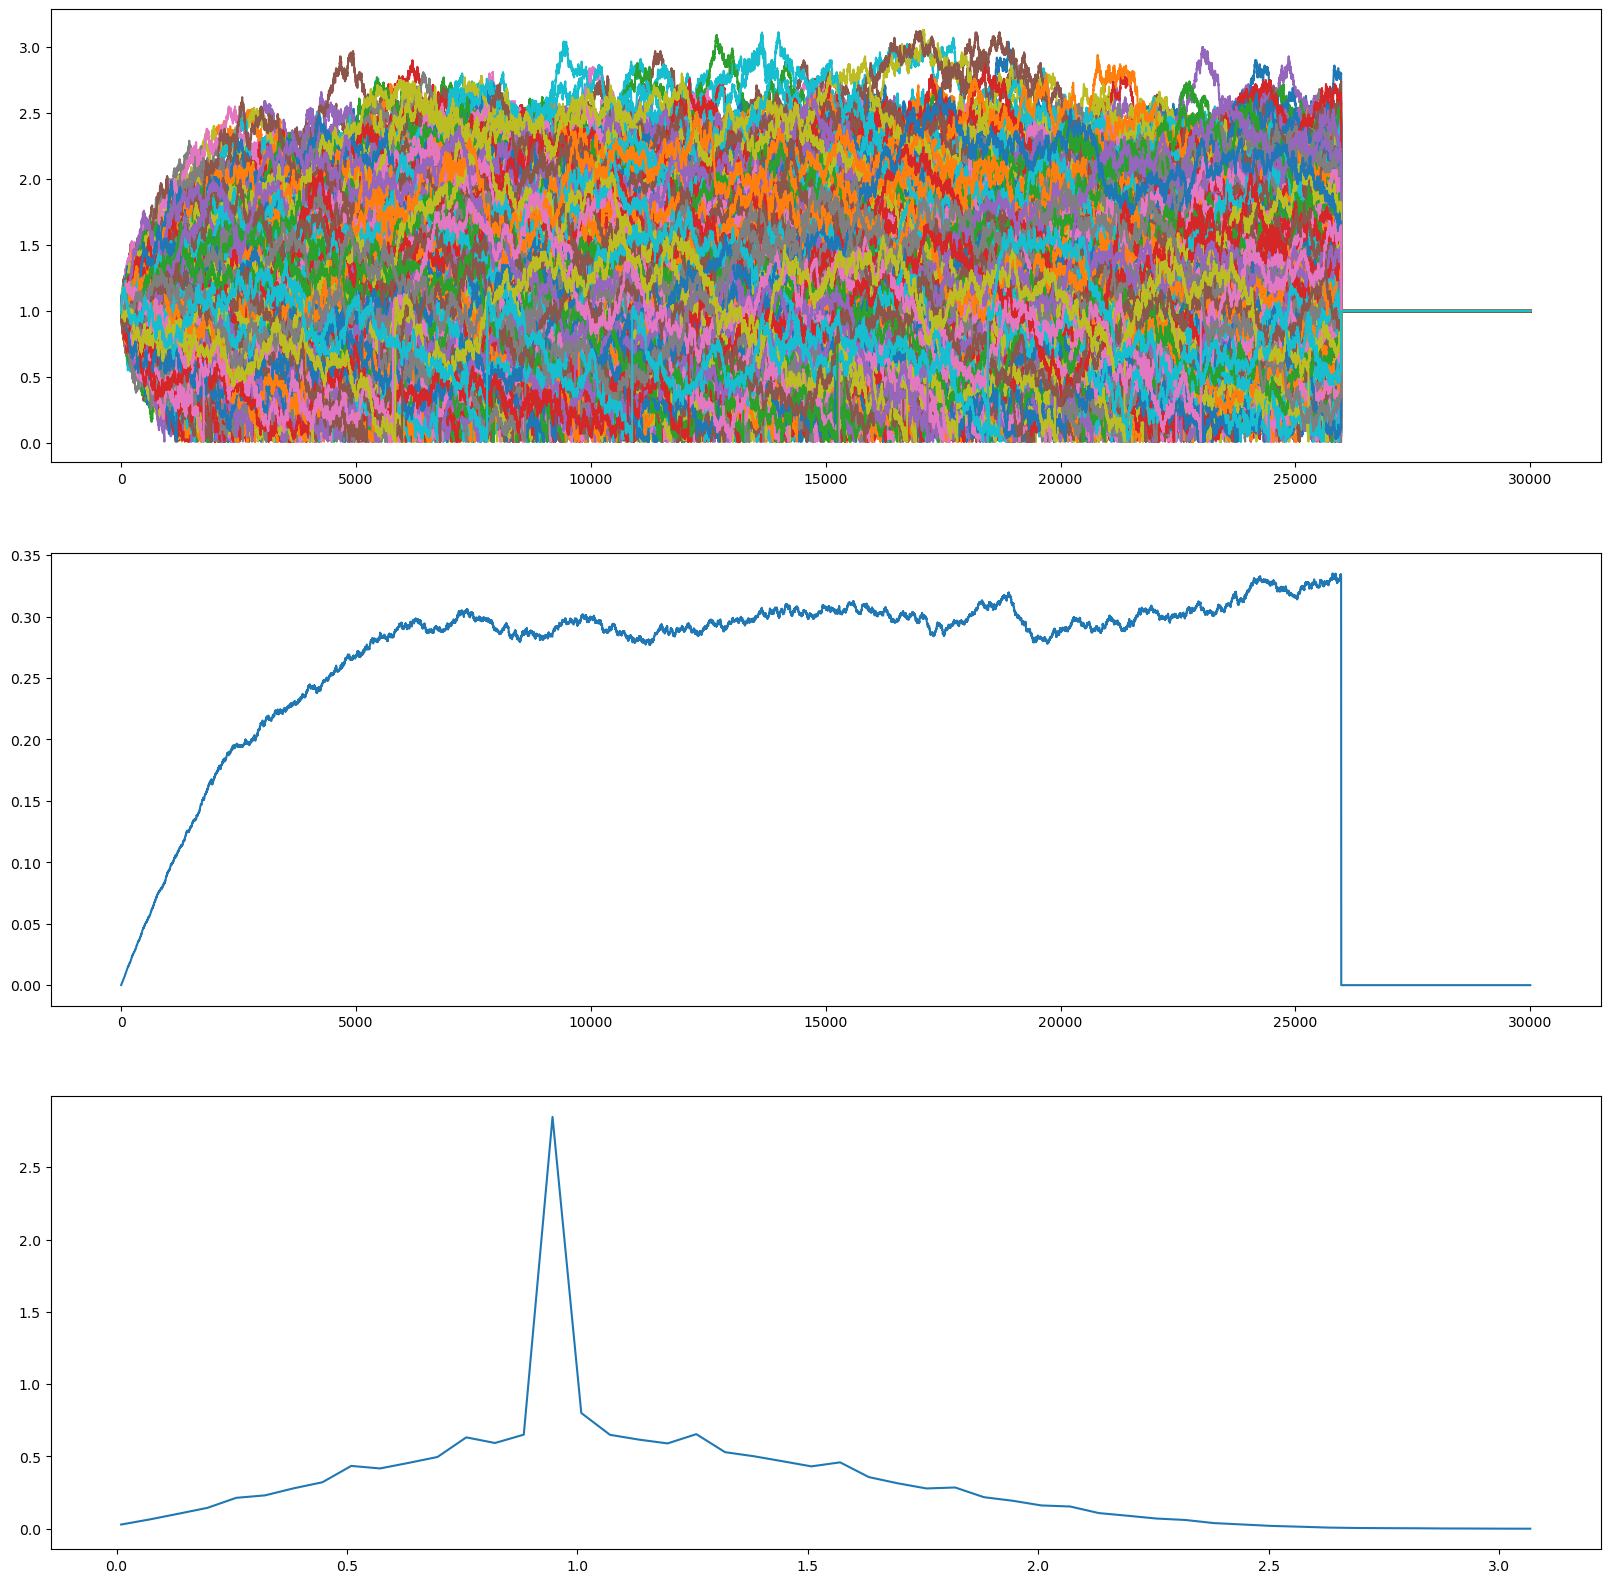

[ 921. 1161. 1179. ... 7371. 3217. 5730.]


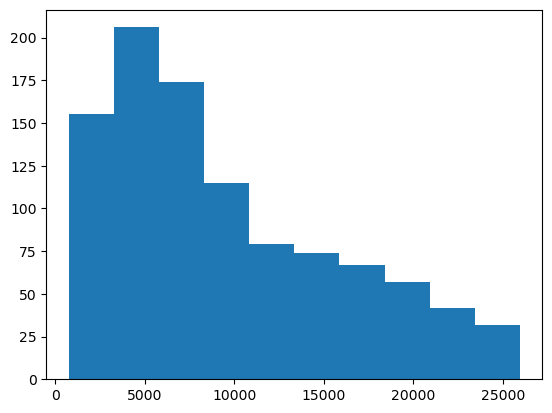

In [29]:
#plot_sim(do_sim(10000,1000,double_well,xinit=1),xinit=1)
run()

In [74]:
np.inf

inf